# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
# Write your code here to read the data
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1/foodhub_order.csv')
warnings.filterwarnings("ignore")

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("There are",data.shape[0],"rows and ",data.shape[1],"columns.")


There are 1898 rows and  9 columns.


#### Observations: There are 1898 rows and  9 columns.

                 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


`#### Observations:
      
  There are

            4 columns of type int64,
            4 columns of type object
            1 column of type float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#to check whether there are any null values present we use isnull() and sum() is used to calculate the total number of null values in each column if present
data.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:  No null values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#describe() is used to get the statistical summary of data.We have assigned the value 'all' to include parameter to get the description of all types of data.
#The default decribe() gives only the data of numerical columns
data.describe( include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [ ]:
print("Minimum time it taked for food to be propered once the order is placed = ",data['food_preparation_time'].min(),"minutes")
print("Average time it taked for food to be propered once the order is placed = ",data['food_preparation_time'].mean().round(3),"minutes")
print("Maximum time it taked for food to be propered once the order is placed = ",data['food_preparation_time'].max(),"minutes")

Minimum time it taked for food to be propered once the order is placed =  20 minutes
Average time it taked for food to be propered once the order is placed =  27.372 minutes
Maximum time it taked for food to be propered once the order is placed =  35 minutes


#### Observations:
min time to food preparation :20 minutes

avg time to food preparation : 27.372 minutes

max time for food preparation : 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:

data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
print("No of orders that are not rated =",data['rating'].value_counts()['Not given'])

No of orders that are not rated = 736


#### Observations:
Out of the 1898 orders placed for 736 orders rating was 'Not given'.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Observations on orders placed by different customer ids

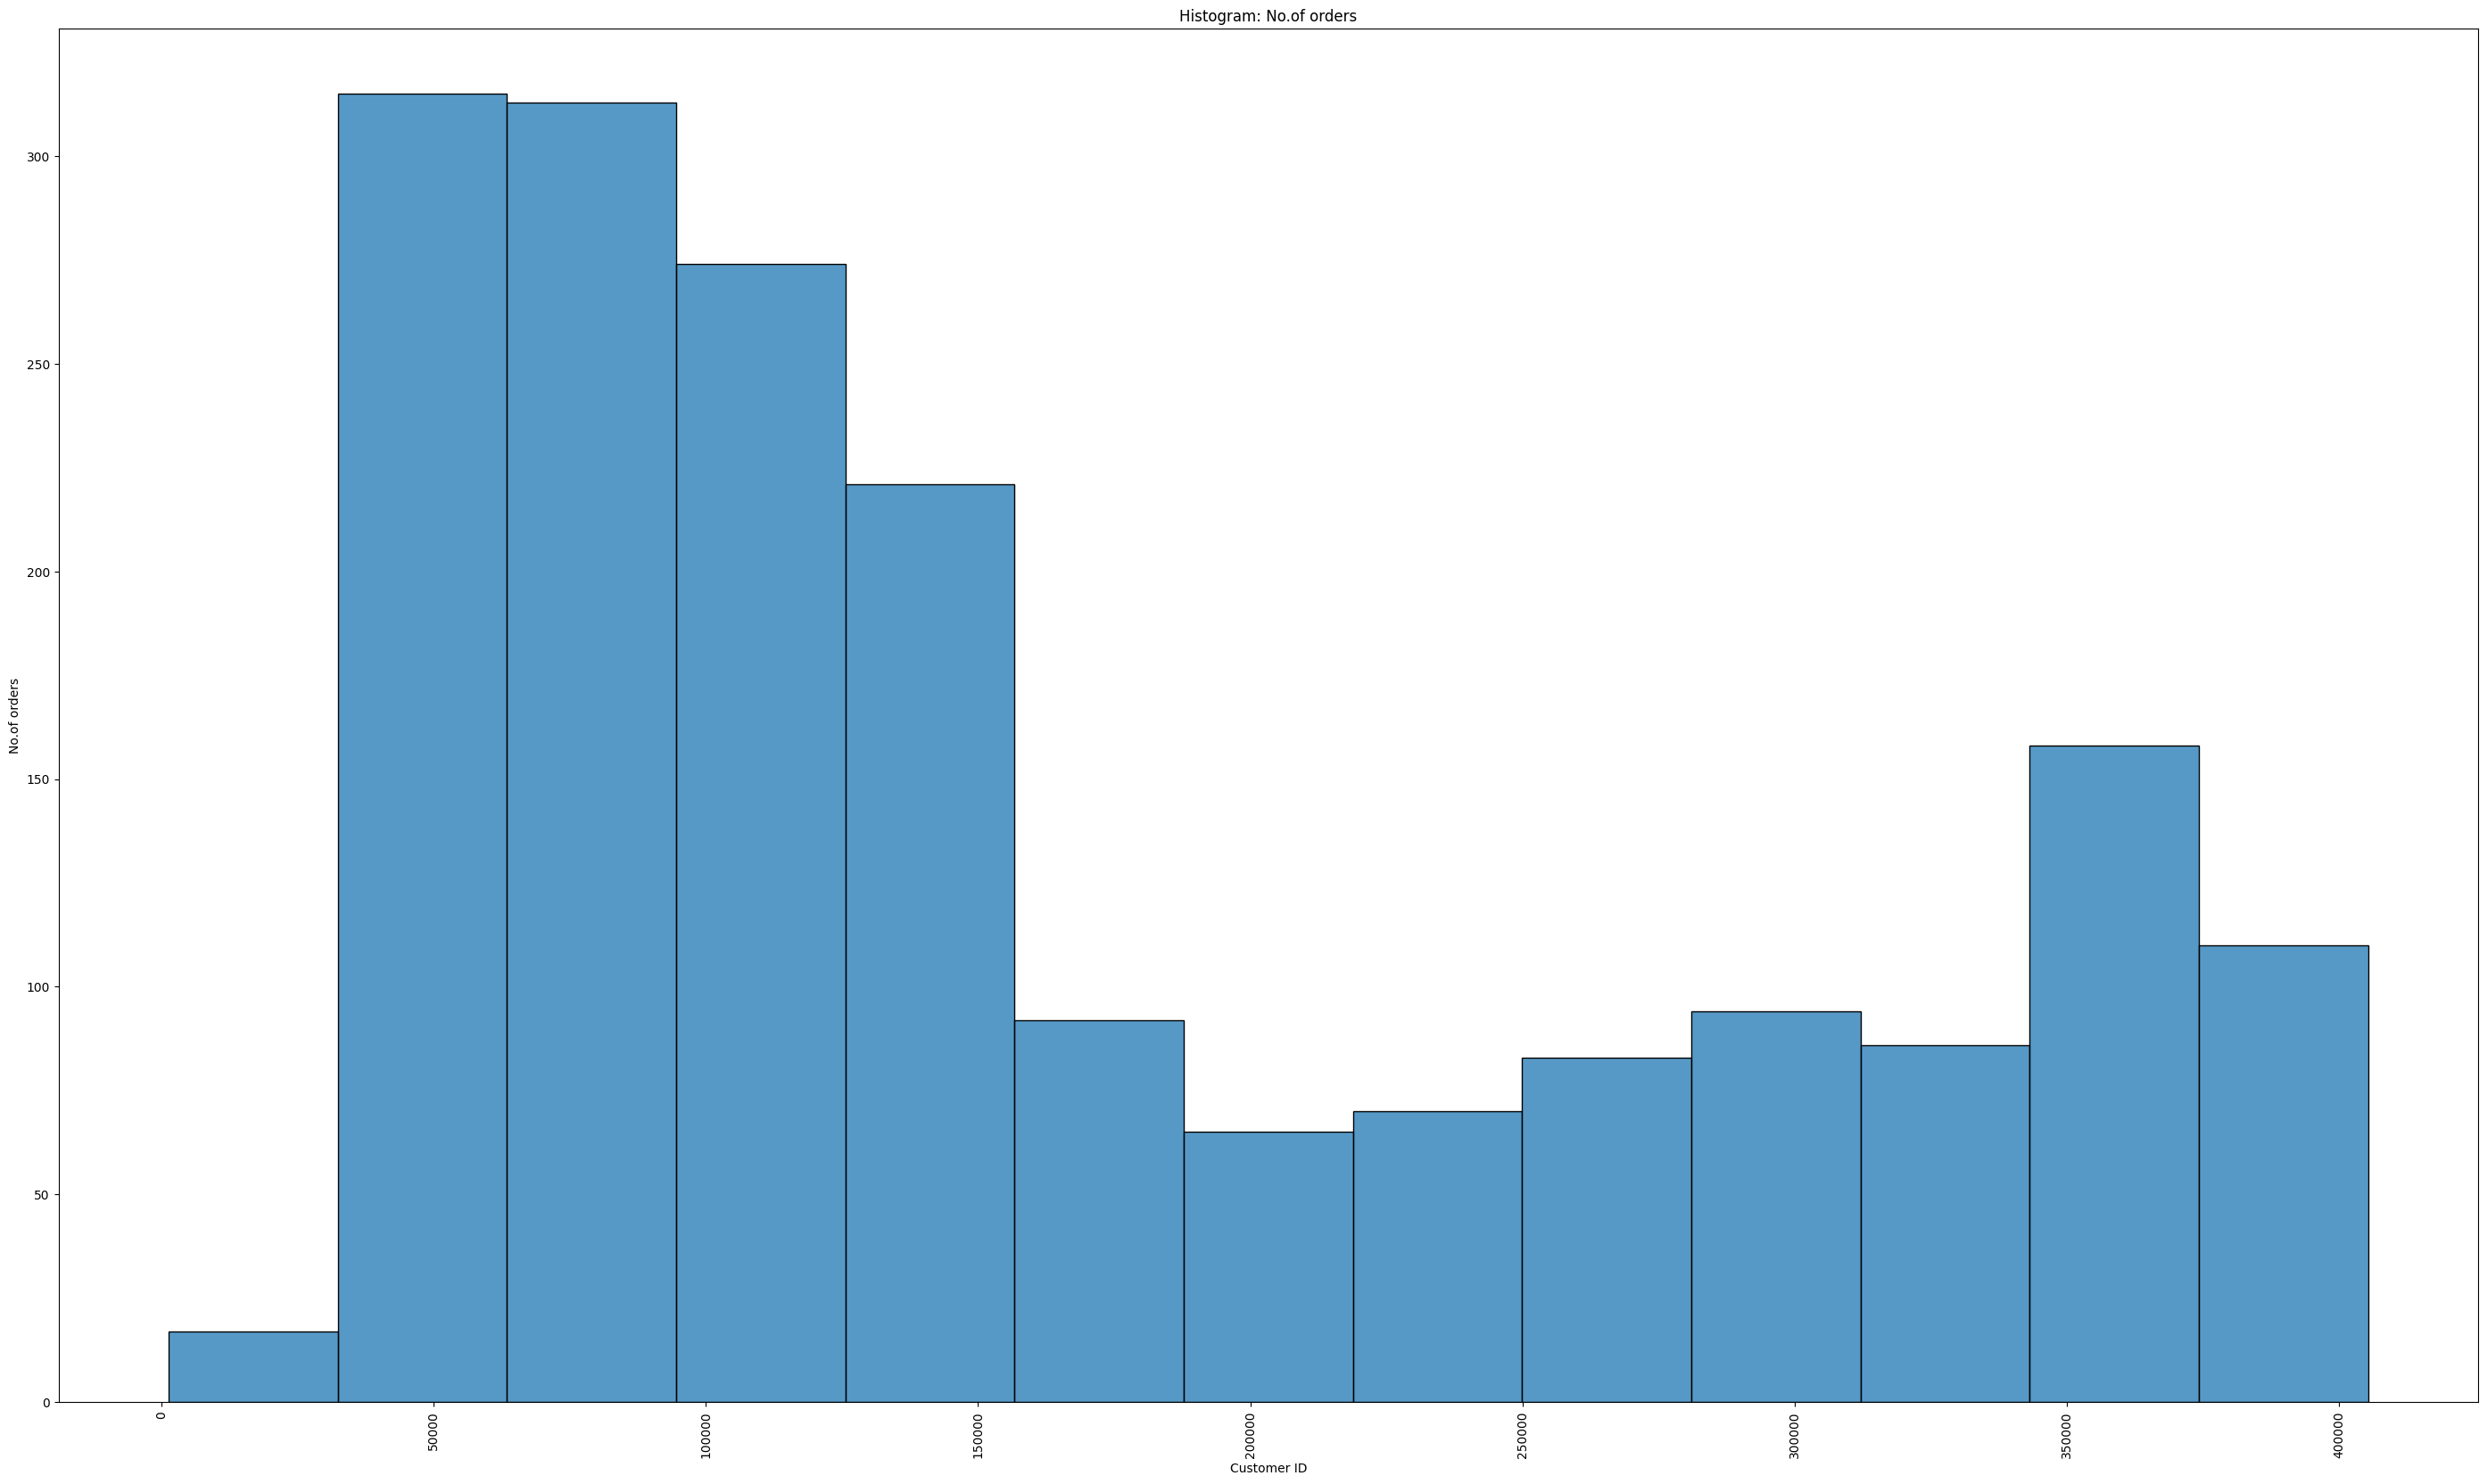

In [ ]:
plt.figure(figsize=(35,20))
plt.title('Histogram: No.of orders placed by different customers')
sns.histplot(data =data,x = 'customer_id')
plt.xlabel('Customer ID')
plt.ylabel('No.of orders')
plt.xticks(rotation =90);
plt.show()

In [ ]:
data['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


# Observations:


*   There are almost 1200 customers
*   Customer with customer id 52832 has placed the most no of orders,followed by the customers with the customer id 47440 and 83287

*   We can also see that majority of the orders are placed with IDS in the lower range.The number of orders placed decreases when the range of IDs increase.If the ids are sequential IDs,it shows that majority of the orders are placed by the customers who joined the app earlier










# **Observations on Number of orders per restaurant**

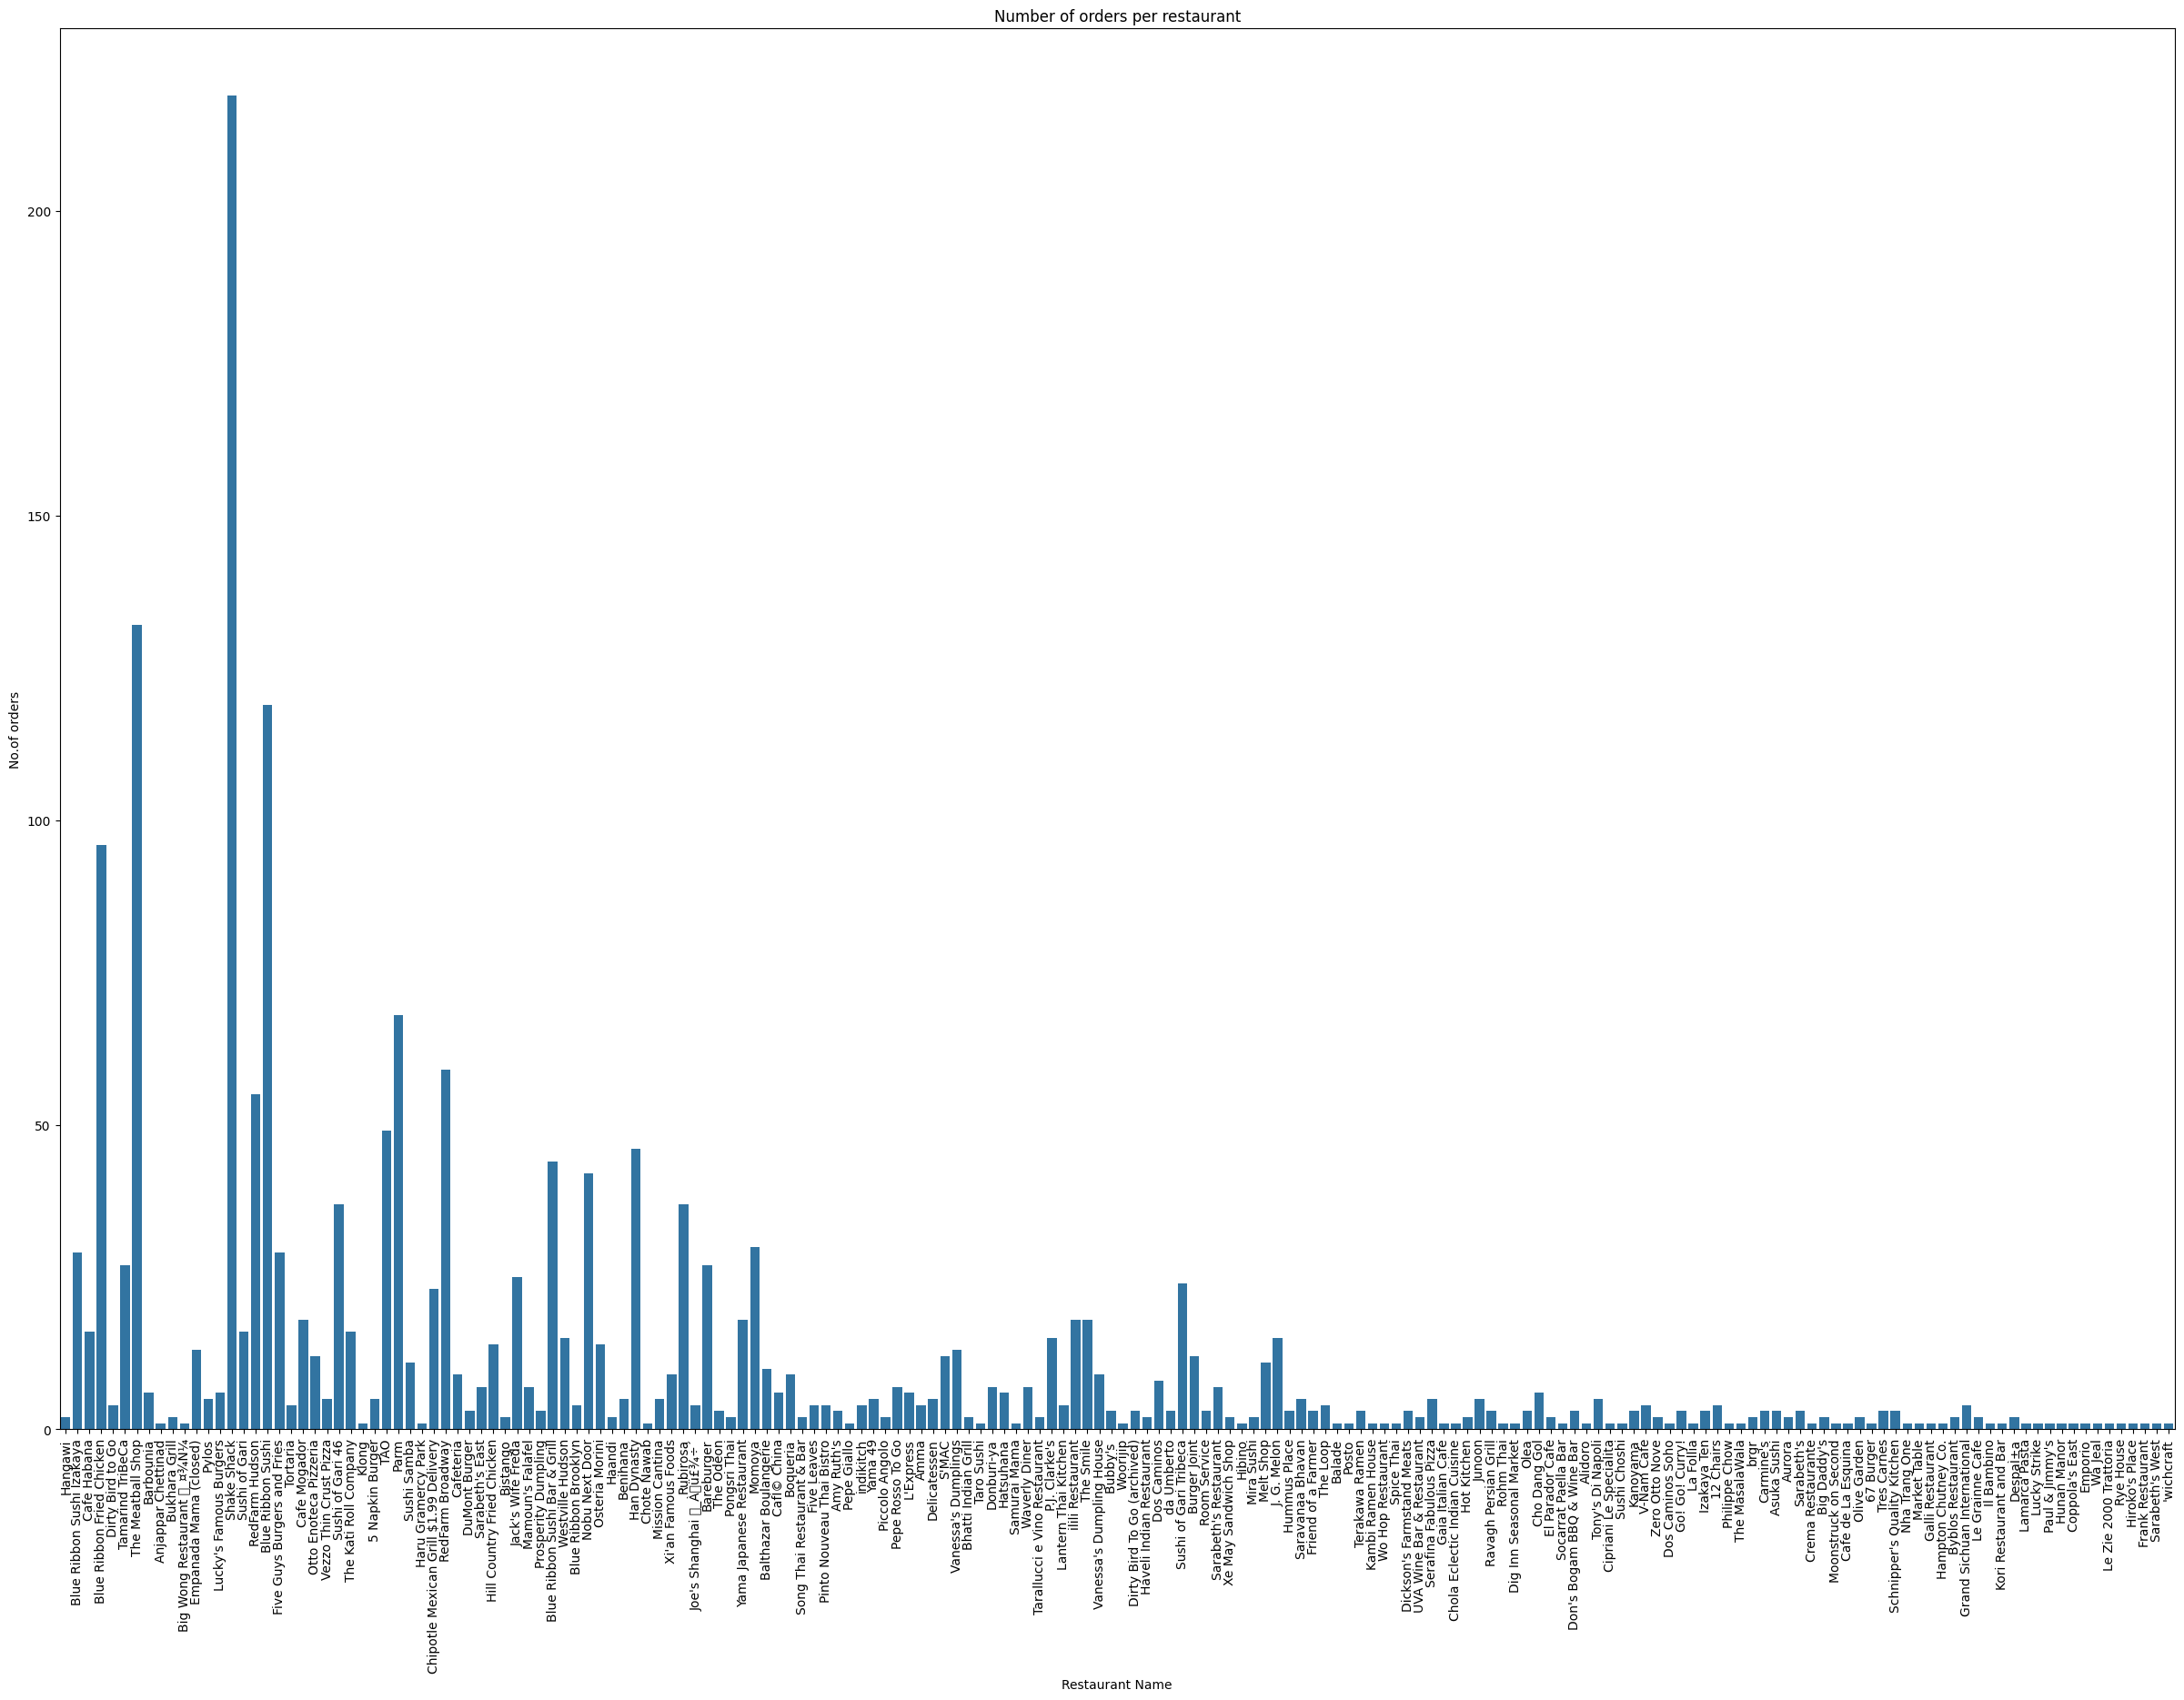

In [6]:
plt.figure(figsize=(30,20))
plt.title('Number of orders per restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('No.of orders')
sns.countplot(data =data,x = 'restaurant_name')
plt.xticks(rotation =90);
plt.show();


In [ ]:
data['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


# **Observations:**

*   Shake Shack has received the highest number of orders(219),followed by 'The
Meatball Shop and Blue Ribbon Sushi.

*   We can see that plot is heavily skewed with some of the restaurants being really popular and some being the least favourite.





# Observations on Most popular Cusine

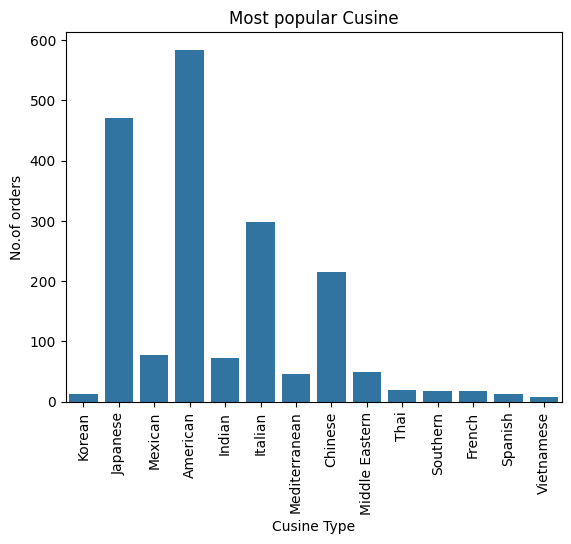

In [ ]:
plt.title('Most popular Cusine')
plt.xlabel('Cusine Type')
plt.ylabel('No.of orders')
sns.countplot(data =data,x = 'cuisine_type')
plt.xticks(rotation =90);
plt.show()

In [ ]:
data['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


**### Observations :**

American cuisine is the most ordered cusine,followed by Japanese and Italian

# Observations on cost of order

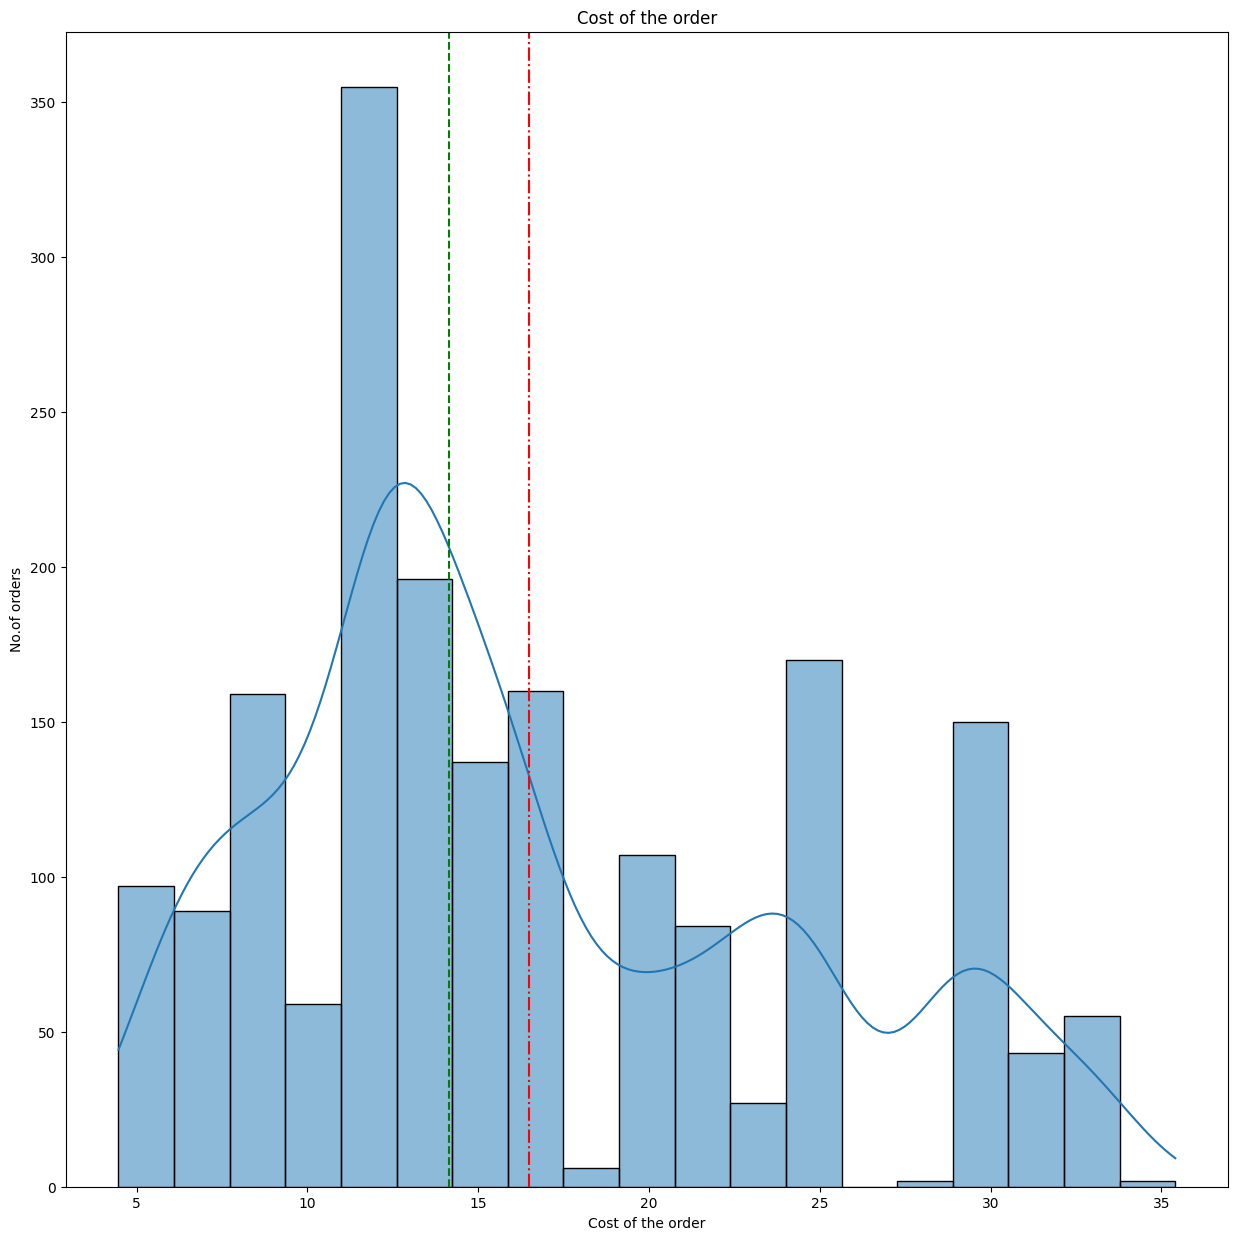

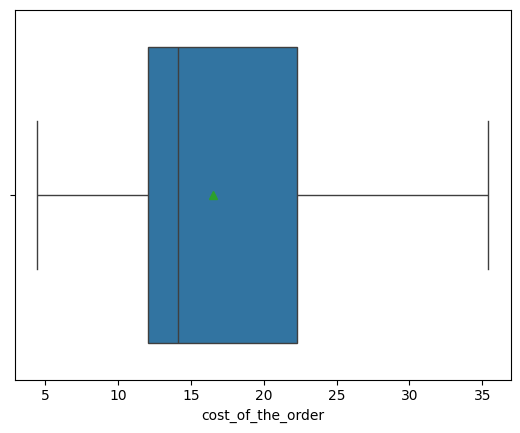

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Cost of the order')
plt.xlabel('Cost of the order')
plt.ylabel('No.of orders')
ax=sns.histplot(data = data,x = 'cost_of_the_order',kde= True);
plt.axvline(data['cost_of_the_order'].mean(),label = 'mean',color = 'red',linestyle = '-.');
plt.axvline(data['cost_of_the_order'].median(),label = 'median',color = 'green',linestyle = '--');
plt.show();
sns.boxplot(data = data,x = 'cost_of_the_order',showmeans = True);
plt.show();

In [ ]:
data['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000
mean,16.499
std,7.484
min,4.470
25%,12.080
50%,14.140
75%,22.297
max,35.410


In [ ]:
data['cost_of_the_order'].value_counts()

,count
cost_of_the_order,
12.180,86
12.130,82
12.230,47
24.200,42
29.100,37
...,...
5.480,1
17.070,1
6.260,1


# **Obervations:**



*   Cost of the order is  positively skewed.Here as the cost of the order increases,the count decreases
*  Min value of cost of order is 4.47 and max value is 35.41

*   Median of the cost of the oder is 14.140,while mean is 16.49


*   Cost of the order most preferred by the customer is  12.180


*   Cost of the orders is within the range 4-36













# Lets see the trend of number of orders placed in the day of the week

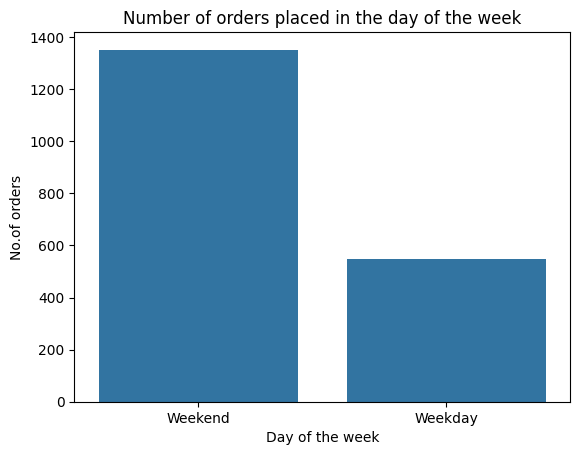

In [ ]:
plt.title('Number of orders placed in the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('No.of orders')
sns.countplot(data =data,x = 'day_of_the_week')
plt.show()

In [ ]:
data['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


# Observations:



*   The number of orders placed during weekends is 71.2% of total number of orders placed.ie Majority of the orders on the app is placed during the weekends


# Observations on ratings

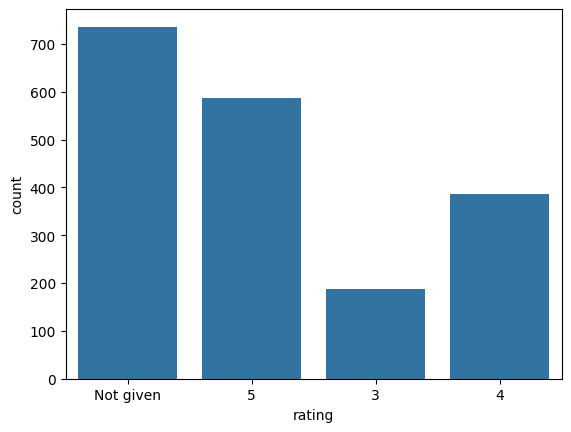

In [ ]:
sns.countplot(data =data,x = 'rating')
plt.show()

## Observations:

About 736 of the orders are not rated and the value of those ratings is given as 'Not given'.ie 38% of the orders are not given any ratings

In [ ]:
#To calclate the average of the ratings given by the customers,we are replacing the 'Not Given' as NaN and converting the typepf ratings to float
#To calculate the average of the ratings made.Lets create a data with only rated values
#We are doing the modifications of the rating after copying the original data to another dataframe so that the original dataframe is not manipulated
new_data = data.copy()
new_data['rating'] = new_data['rating'].replace(['Not given'],np.nan)
new_data['rating'] = new_data['rating'].astype(float)
new_data['rating'] = new_data['rating'].dropna()


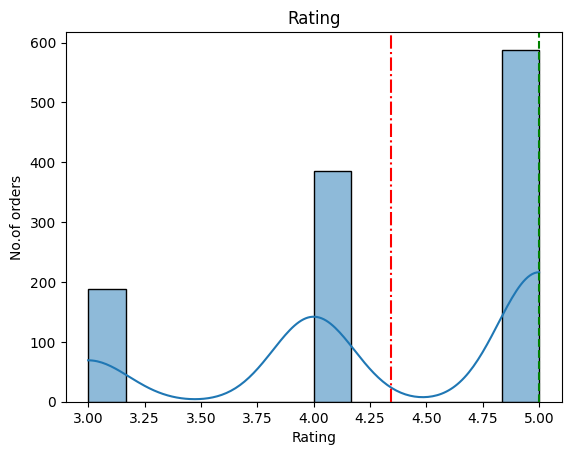

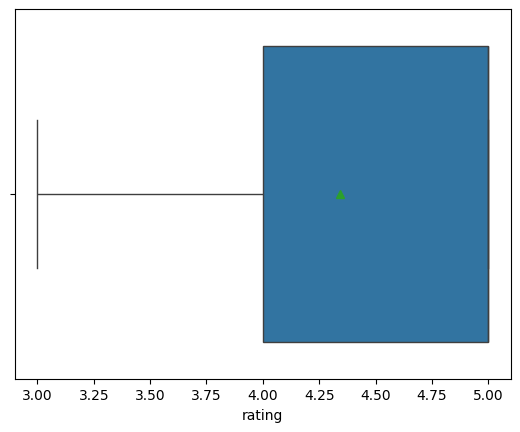

In [ ]:
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('No.of orders')
sns.histplot(data = new_data,x = 'rating',kde= True);
plt.axvline(new_data['rating'].mean(),label = 'mean',color = 'red',linestyle = '-.');
plt.axvline(new_data['rating'].median(),label = 'median',color = 'green',linestyle = '--');
plt.show();

# Plotting the 'rating' after removing the  'Not given' rating
sns.boxplot(data = new_data,x = 'rating',showmeans = True);
plt.show()

In [ ]:
new_data['rating'].describe()

,rating
count,1162.000
mean,4.344
std,0.741
min,3.000
25%,4.000
50%,5.000
75%,5.000
max,5.000


#  Observations:

*   Rating is negatively /left skewed with the mean around 4.3 and median at 5.ie Median>Mean.
*  Mean value of the rating is around 4.3 and the median is 5


*   Most of the ratings are on the higher side

*    Peak at 5 indicated that customers are mostly satisfied

*   All these observations are based on the ratings given by the customers.Almost 38% of the orders are not given ratings.So we cannot be sure the same will be the scenario if all the orders were rated



## Observations on food_preparation_time

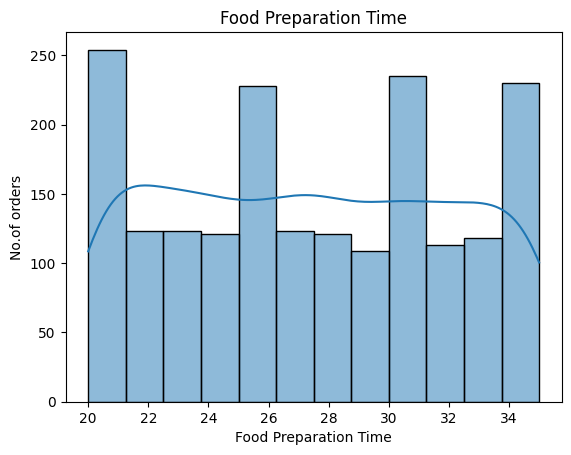

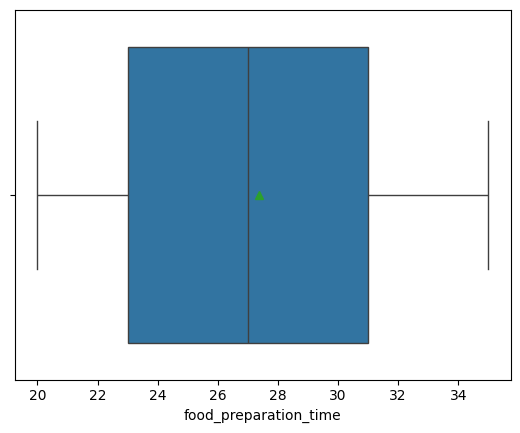

In [ ]:
plt.title('Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('No.of orders')
sns.histplot(data = data,x = 'food_preparation_time',kde= True);
plt.show();
sns.boxplot(data = data,x = 'food_preparation_time',showmeans = True);
plt.show();


In [ ]:
data['food_preparation_time'].describe()

,food_preparation_time
count,1898.000
mean,27.372
std,4.632
min,20.000
25%,23.000
50%,27.000
75%,31.000
max,35.000


Observations:


*   Food_preparation_time peaks around 20,26,30,34.Indicating there are the most common food preparation time
*   food_preparation_time varies in the range 20-35 with the mean as 27.32 and median as 27





# Let us analyse the spread of delivery_time

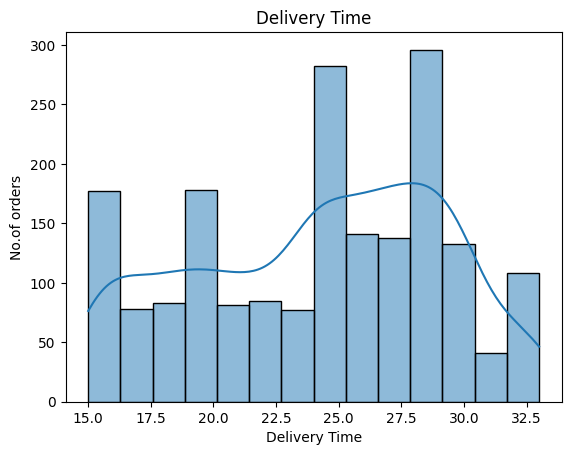

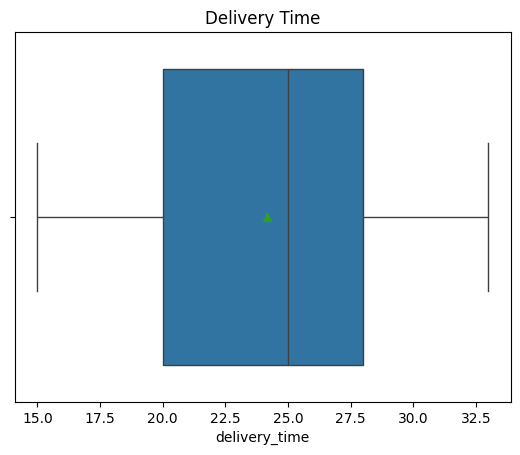

In [ ]:
plt.title('Delivery Time')
sns.histplot(data = data,x = 'delivery_time',kde= True);
plt.xlabel('Delivery Time')
plt.ylabel('No.of orders')
plt.show()

#Boxplot
plt.title('Delivery Time')
sns.boxplot(data = data,x = 'delivery_time',showmeans = True);

In [ ]:
data['delivery_time'].describe()

,delivery_time
count,1898.000
mean,24.162
std,4.973
min,15.000
25%,20.000
50%,25.000
75%,28.000
max,33.000


# **Observations:**


*   'delivery_time' is slightly left skewed .
with median 25 and mean around 24

*     Most of the delivery times are on the higher side
*   'delivery_time' varies in the range 15-33


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
data['restaurant_name'].value_counts().head().reset_index()

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:

  Shake Shack receives the most number of orders followed by The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken,Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:

data.loc[data['day_of_the_week']=='Weekend','cuisine_type'].value_counts()


,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
Most popular cuisine on weekend is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Accessing rows with cost_of _order >20
count = data.loc[data['cost_of_the_order']>20]
print("Total no of orders with cost >20 = ",count.shape[0])

Total no of orders with cost >20 =  555


In [ ]:
#Total no of orders
print("Total no of orders = ",data.shape[0])

Total no of orders =  1898


In [ ]:
print("Percentage of orders cost more than 20 dollars is", (count.shape[0]/data.shape[0])*100,"%")


Percentage of orders cost more than 20 dollars is 29.24130663856691 %



#### Observations:
Percentage of orders greater than 20 dollars is 29.24

Which shows majority of the orders are <=20 dollars




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:

print("Mean delivery time = ",data['delivery_time'].mean().round(4),"minutes")

Mean delivery time =  24.1617 minutes


#### Observations:

Mean of order delivery time = 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
data['customer_id'].value_counts().head(3).reset_index()


,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: xlabel='customer_id', ylabel='count'>

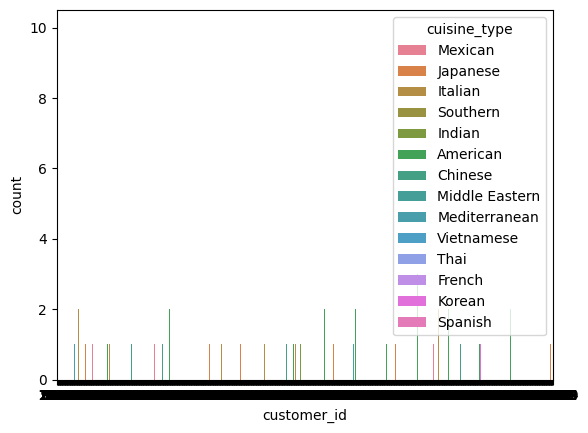

In [10]:
sns.countplot(data = data,x ='customer_id',hue = 'cuisine_type')

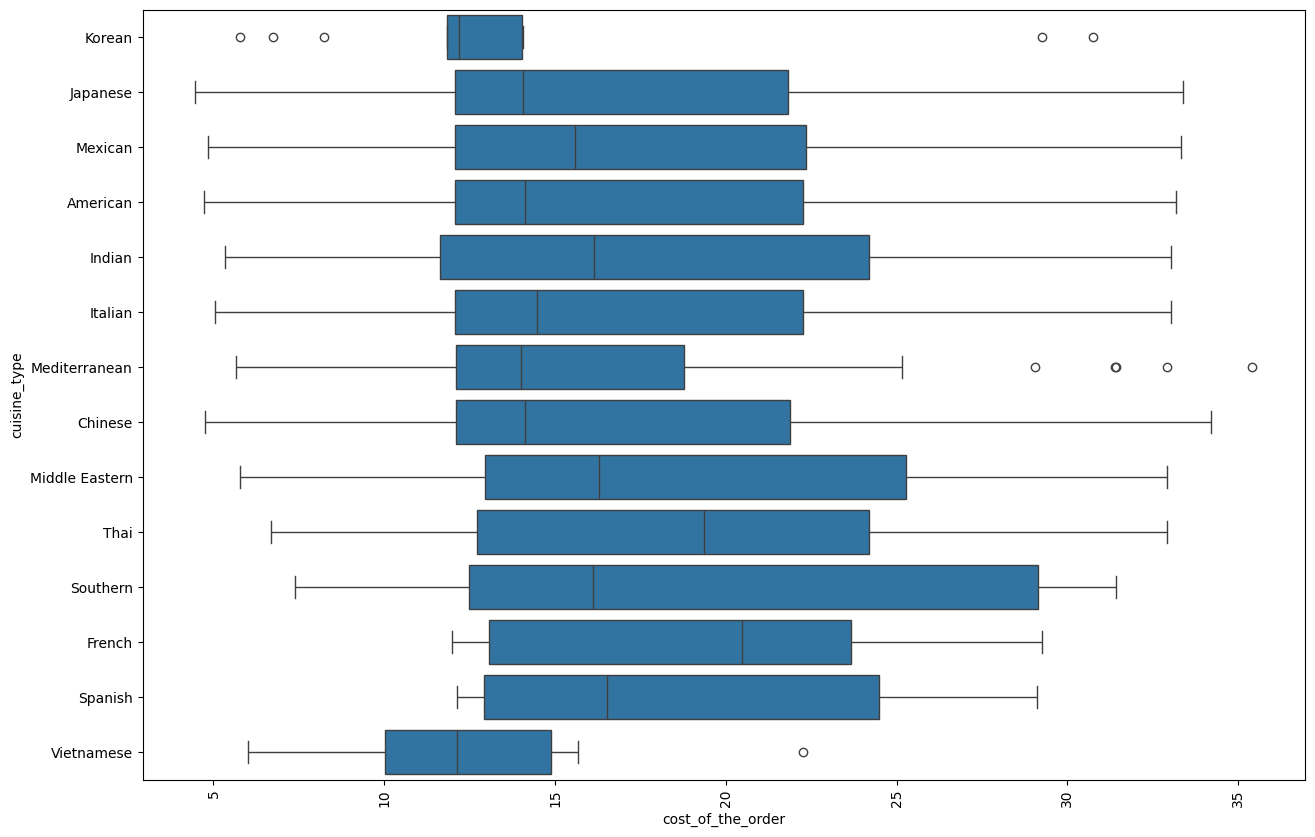

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data= data,y= 'cuisine_type',x = 'cost_of_the_order');
plt.xticks(rotation = 90);

<Figure size 3000x1500 with 0 Axes>

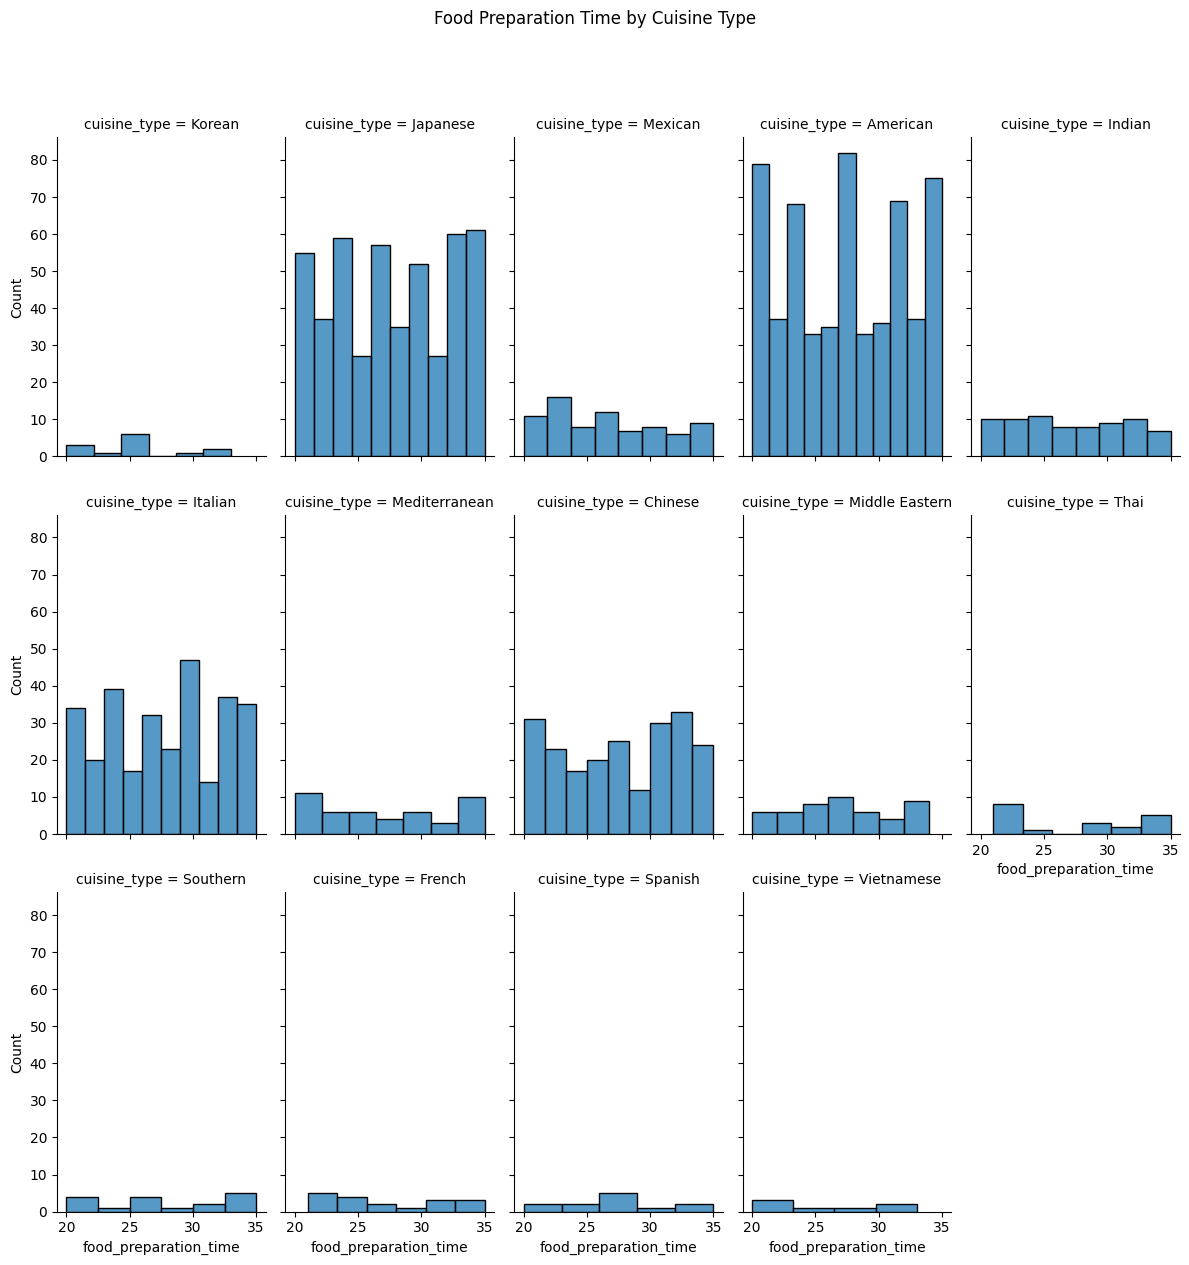

In [27]:
plt.figure(figsize=(30,15))

g=sns.FacetGrid(data = data,col = 'cuisine_type',col_wrap=5,height = 4,aspect = .6)
g.fig.suptitle("Food Preparation Time by Cuisine Type", y=1.05)
g.set_axis_labels("Food Preparation Time", "Count")

g.map(sns.histplot,'food_preparation_time');

g.tight_layout()
plt.show()

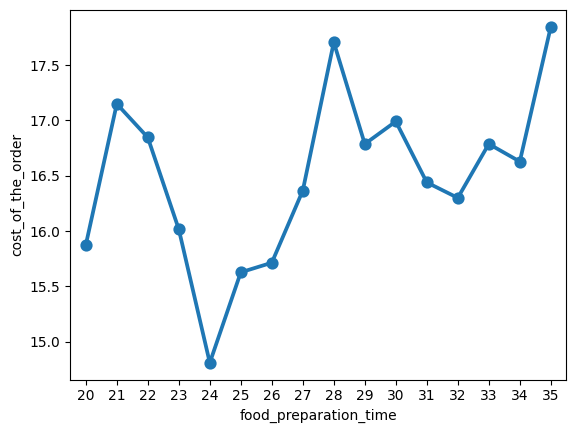

In [ ]:
sns.pointplot(data = data,y= 'cost_of_the_order',x = 'food_preparation_time',errorbar=None);

There is no particular correlation between delivery time and cost_of the order

# Lets check whether there is any relation between day of the week and the cost of the order

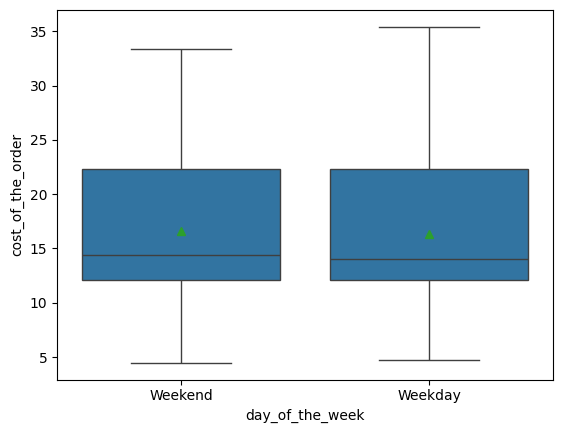

In [ ]:
sns.boxplot(data = data,x = 'day_of_the_week',y = 'cost_of_the_order',showmeans = True);

Observations :Average cost of the order is almost the same on Weekdays and weekend

In [ ]:
total_order_cost = data.groupby(['day_of_the_week'])['cost_of_the_order'].sum()
total_order_cost

Total cost order is higher on weekends as the no of orders on weekends are higher

# Delivery_time vs day of the week

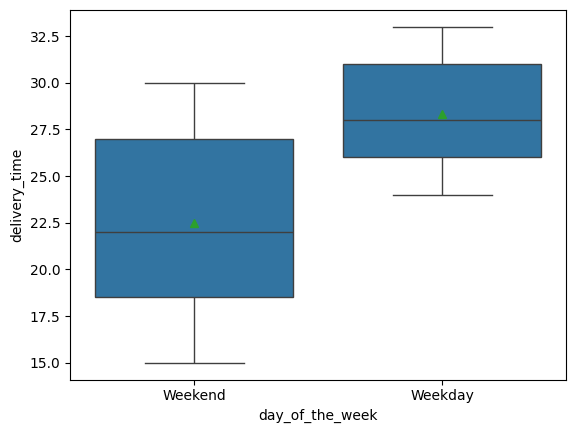

In [ ]:
sns.boxplot(data = data,x = 'day_of_the_week',y = 'delivery_time',showmeans = True);

Delivery _time is greater during the Weekdays compared to the Weekend.Even though the no of orders is greater on weekend,deliveryt_time is greater on weekday

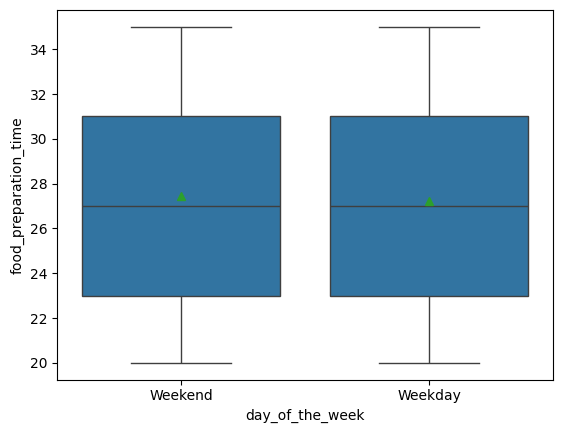

In [ ]:
sns.boxplot(data = data,x = 'day_of_the_week',y = 'food_preparation_time',showmeans = True);

But the food preparation time is similar on Weekdays and Weekend

<Axes: xlabel='day_of_the_week', ylabel='rating'>

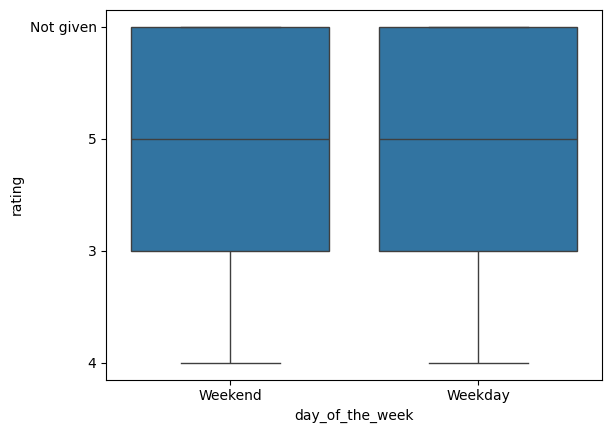

In [ ]:
sns.boxplot(data = data,x = 'day_of_the_week',y = 'rating')

Rating is almost the same on weekdays and weekend

Let us see whether any relation exists between food_preparation_time,delivery_time with rating

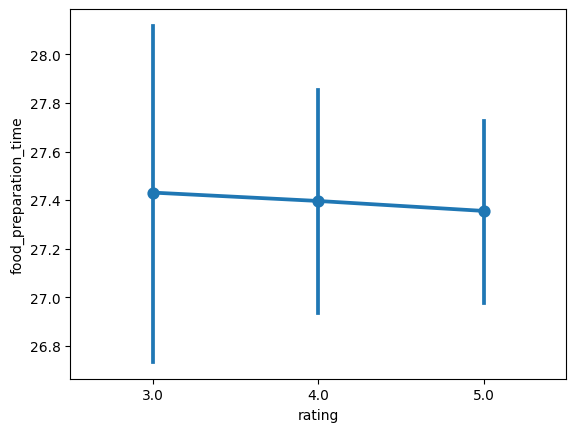

In [ ]:
#s
new = data.copy()
new['rating'] = new['rating'].replace(['Not given'],np.nan)
#new_data['rating'] = new_data['rating'].replace(['Not given'],np.nan)
new['rating'] = new['rating'].astype(float)
sns.pointplot(data = new,y='food_preparation_time',x = 'rating');

Observation: Rating improves slightly as the food_preparation time decreases

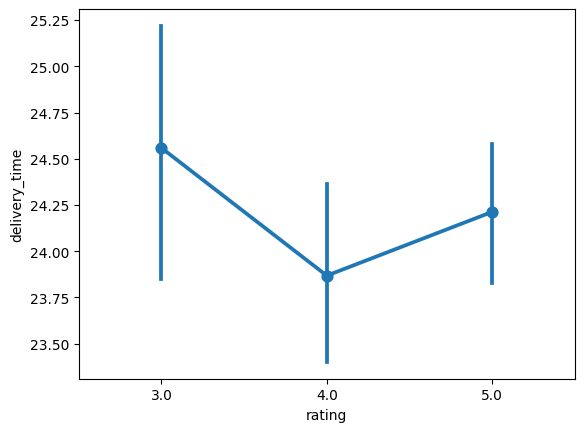

In [ ]:
sns.pointplot(data = new,y='delivery_time',x = 'rating');

Observations:

Lower rating 3.0 - Tend to have highest average delivery time around 24.5 and great variation in delivery times.Which means higher delivery time may contribute to lower customer satisfaction.

rating 4- has the shorstest avg delivery time,which means faster delivery time can improve customer satisfaction but not the highest ratings

rating 5 has avg delivery time greater than rating 4.Whcih means customer is willing to give good rating despite longer delivery time

In short delivery time do affect ratings but cannot say whether it is a strong negative or positive correlation

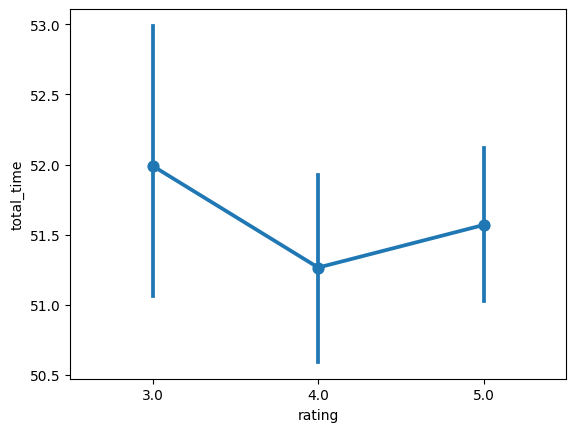

In [ ]:
# let us see how the total time taken affects the ratings given
new['total_time'] = new['food_preparation_time'] + new['delivery_time']
sns.pointplot(data = new,y='total_time',x = 'rating');

Total time do affect ratings as all the orders of total_time greater than 52 min has rating around 3.

In [ ]:
#restaurant_rating= new.groupby(['restaurant_name','cuisine_type'])['rating'].mean().reset_index()
#restaurant_rating['restaurant_name'].value_counts()
new['restaurant_name'].value_counts()
new.info()
new['rating'].value_counts()
#data_cleaned = restaurant_rating.dropna()

#restaurant_rating['cuisine_type'].value_counts()
#sns.scatterplot(data = restaurant_rating,x = 'restaurant_name',y='rating')

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 90.8+ KB


,count
rating,
5.000,588
4.000,386
3.000,188


# Cusine_type vs Food_preparation time

<Axes: xlabel='food_preparation_time', ylabel='cuisine_type'>

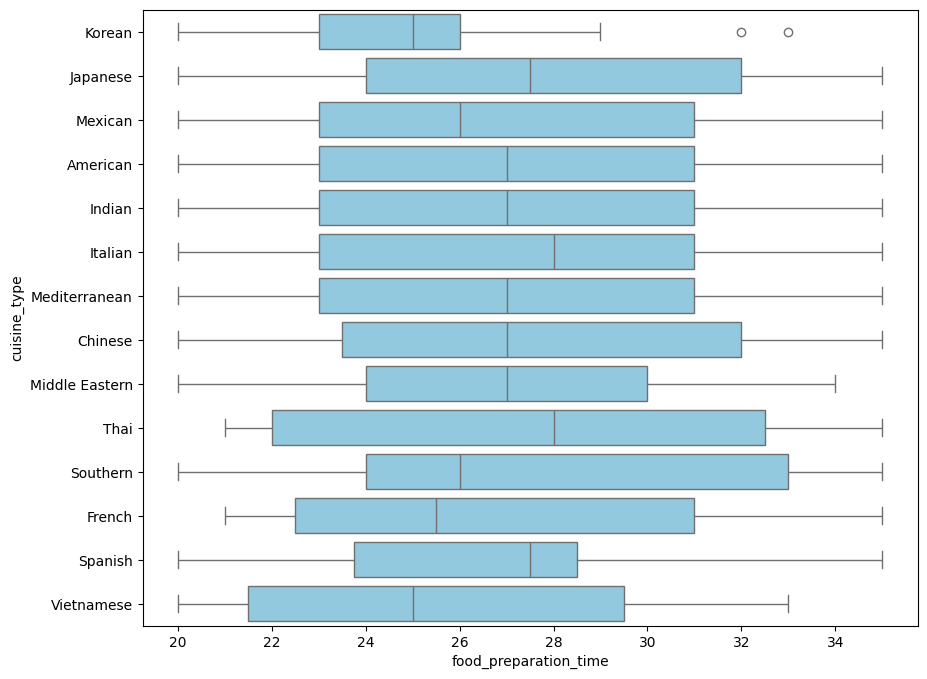

In [39]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Create the boxplot with overlay
sns.boxplot(data=data, y="cuisine_type", x="food_preparation_time", color="skyblue")



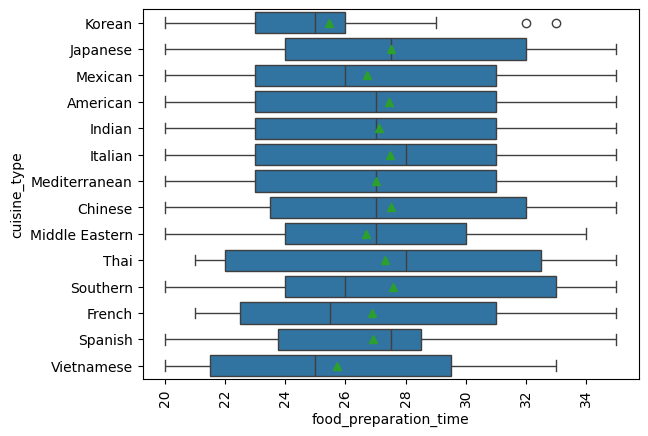

In [33]:
sns.boxplot(data = data,y= 'cuisine_type',x = 'food_preparation_time',showmeans = True);
plt.xticks(rotation = 90);

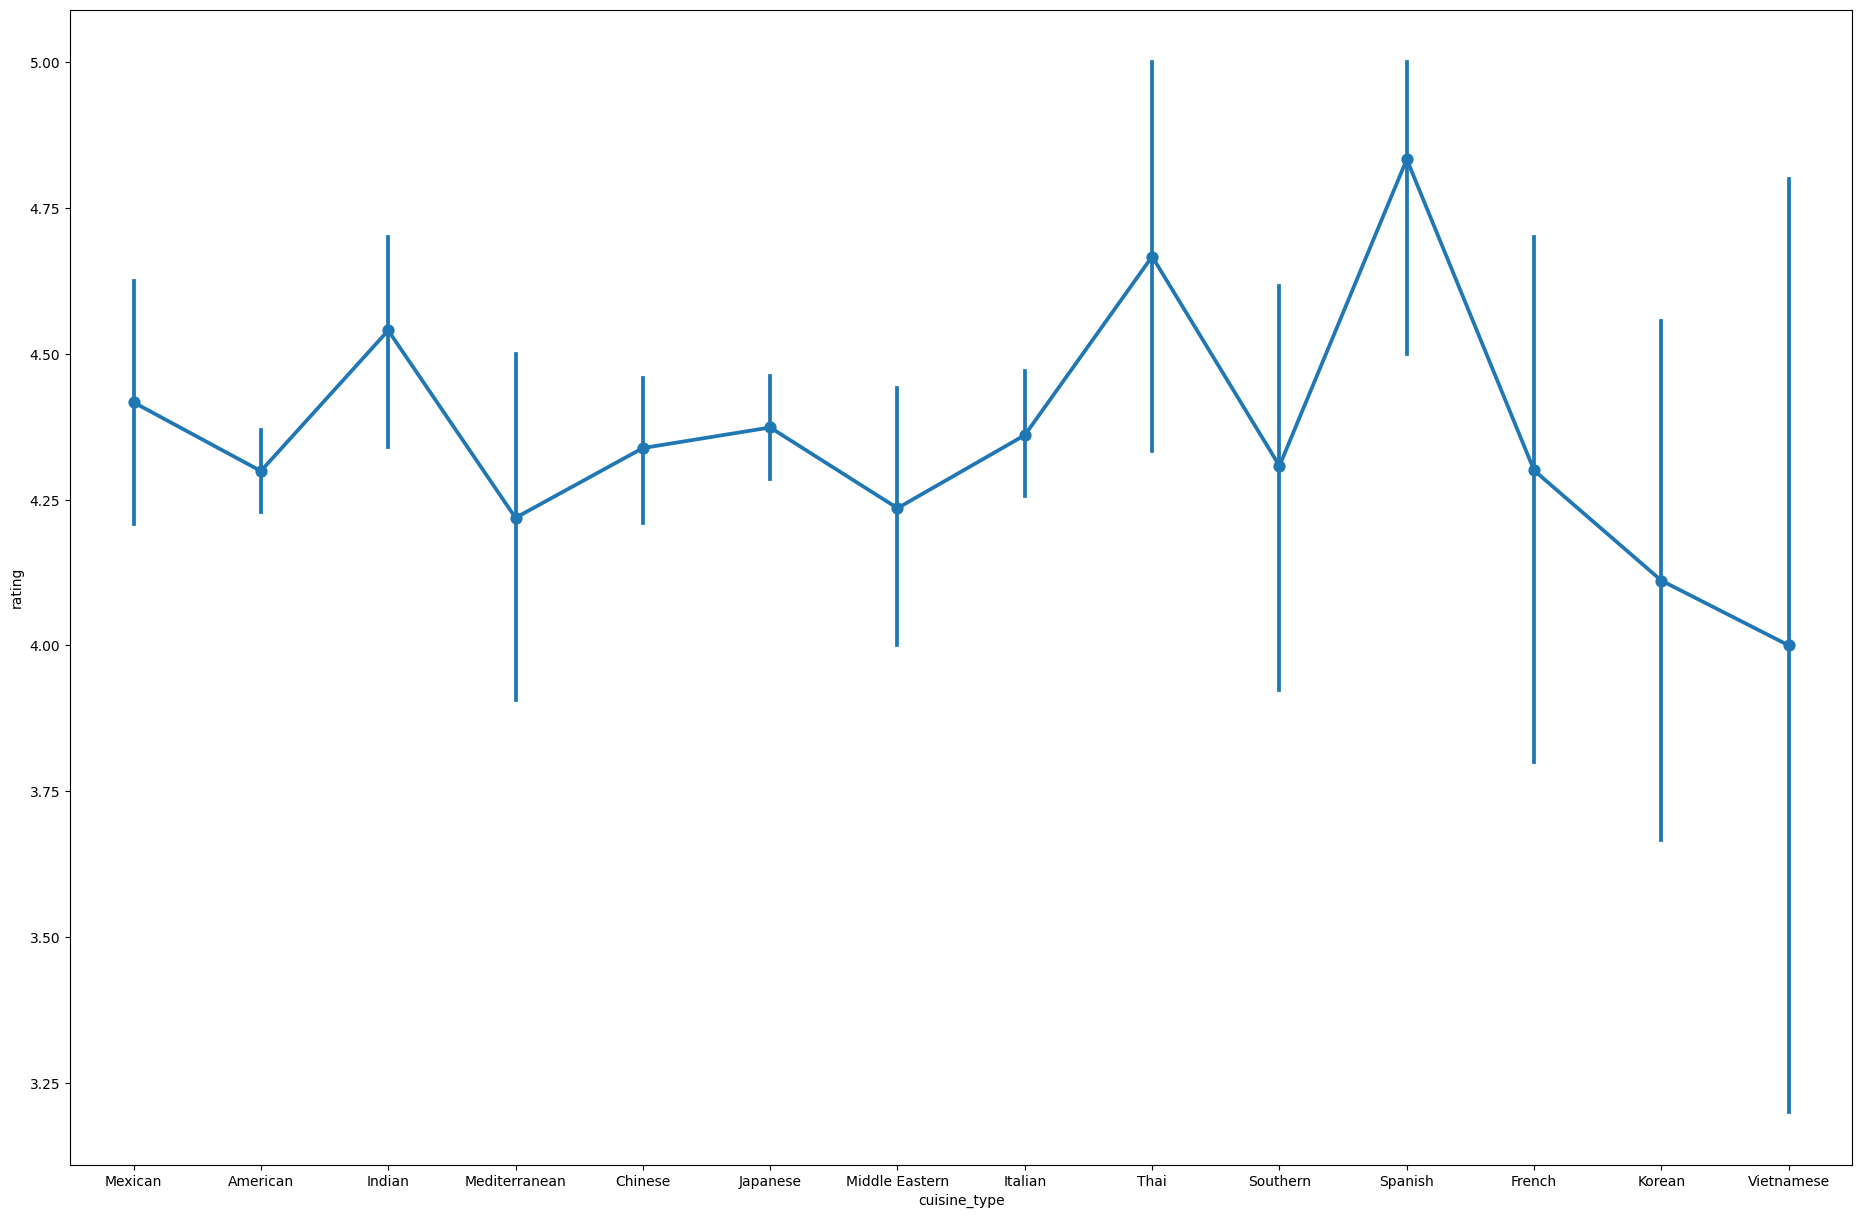

In [ ]:

plt.figure(figsize = (23,15))
sns.pointplot(data = new,y = 'rating',x = 'cuisine_type');

In [ ]:
new.loc[new['rating'] == 5.0].value_counts().reset_index()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,count
0,1476547,83095,Bareburger,American,6.840,Weekend,5.000,22,24,1
1,1477875,154022,Blue Ribbon Sushi Bar & Grill,Japanese,12.180,Weekend,5.000,22,18,1
2,1477825,389740,L'Express,French,11.980,Weekday,5.000,21,28,1
3,1477827,65009,Blue Ribbon Sushi Izakaya,Japanese,8.830,Weekday,5.000,34,27,1
4,1477828,360844,Tamarind TriBeCa,Indian,8.590,Weekday,5.000,32,31,1
...,...,...,...,...,...,...,...,...,...,...
583,1477214,98319,Five Guys Burgers and Fries,American,13.000,Weekday,5.000,30,27,1
584,1477215,27609,Blue Ribbon Sushi Bar & Grill,Japanese,24.250,Weekend,5.000,25,26,1
585,1477218,333216,Shake Shack,American,29.490,Weekend,5.000,20,24,1
586,1477220,41249,Kambi Ramen House,Japanese,32.930,Weekend,5.000,35,19,1


<ipython-input-111-7c89c4ef0d42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = new,y = 'rating',x = 'cuisine_type',showmeans = True,palette = 'Set3');


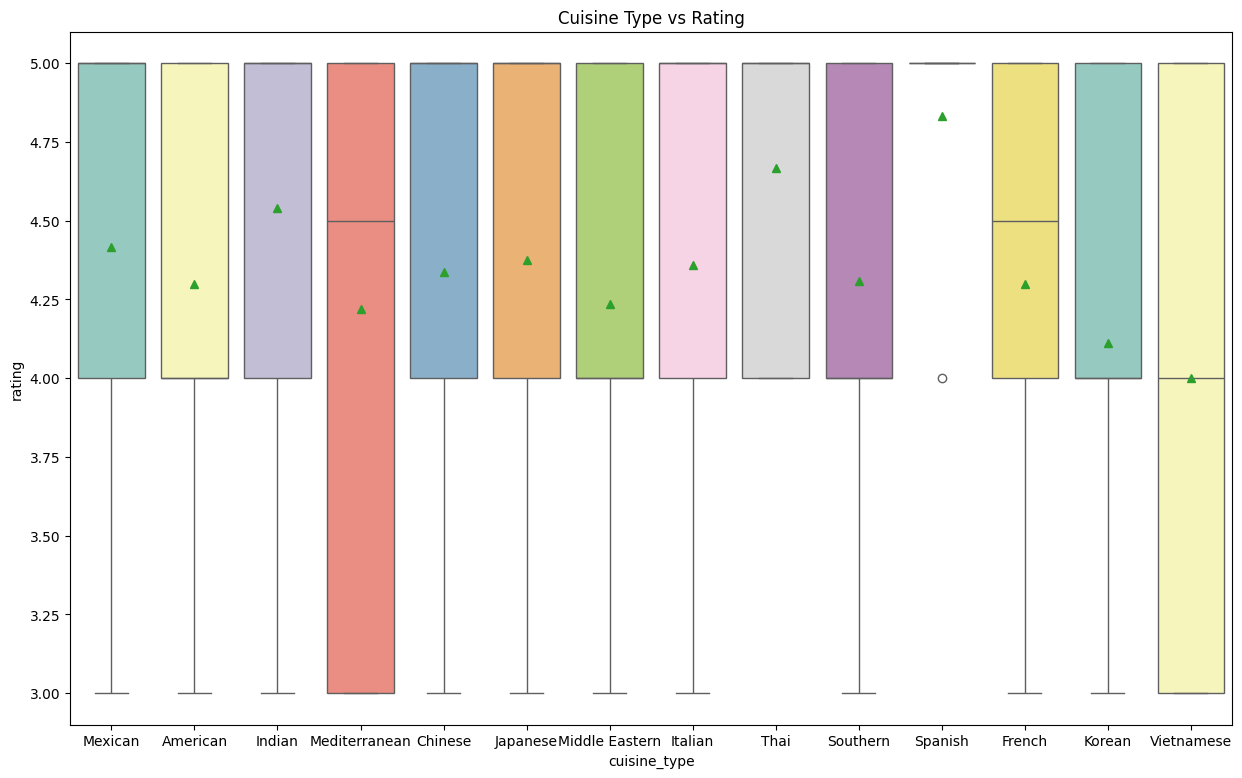

In [ ]:
plt.figure(figsize = (15,9))
plt.title('Cuisine Type vs Rating')
sns.boxplot(data = new,y = 'rating',x = 'cuisine_type',showmeans = True,palette = 'Set3');
plt.show();

In [ ]:
new['cuisine_type'].value_counts()

,count
cuisine_type,
American,368
Japanese,273
Italian,172
Chinese,133
Indian,50
Mexican,48
Middle Eastern,34
Mediterranean,32
Southern,13


In [ ]:
data['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [ ]:
new[new['cuisine_type'] == 'Spanish']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
138,1477431,195927,Boqueria,Spanish,12.130,Weekend,5.000,30,20
667,1476739,290266,Socarrat Paella Bar,Spanish,25.220,Weekend,5.000,23,20
1497,1477589,214028,Boqueria,Spanish,29.050,Weekend,4.000,24,24
1503,1477396,140998,Boqueria,Spanish,13.000,Weekend,5.000,26,24
1581,1478375,214028,Boqueria,Spanish,22.850,Weekend,5.000,28,30
1691,1477454,210544,DespaÌ±a,Spanish,16.060,Weekend,5.000,21,17




*Spanish cuisines are highly rated mostly

*





# Let us analyse how the cost_of _the_order varies with respect to the cuisine _type

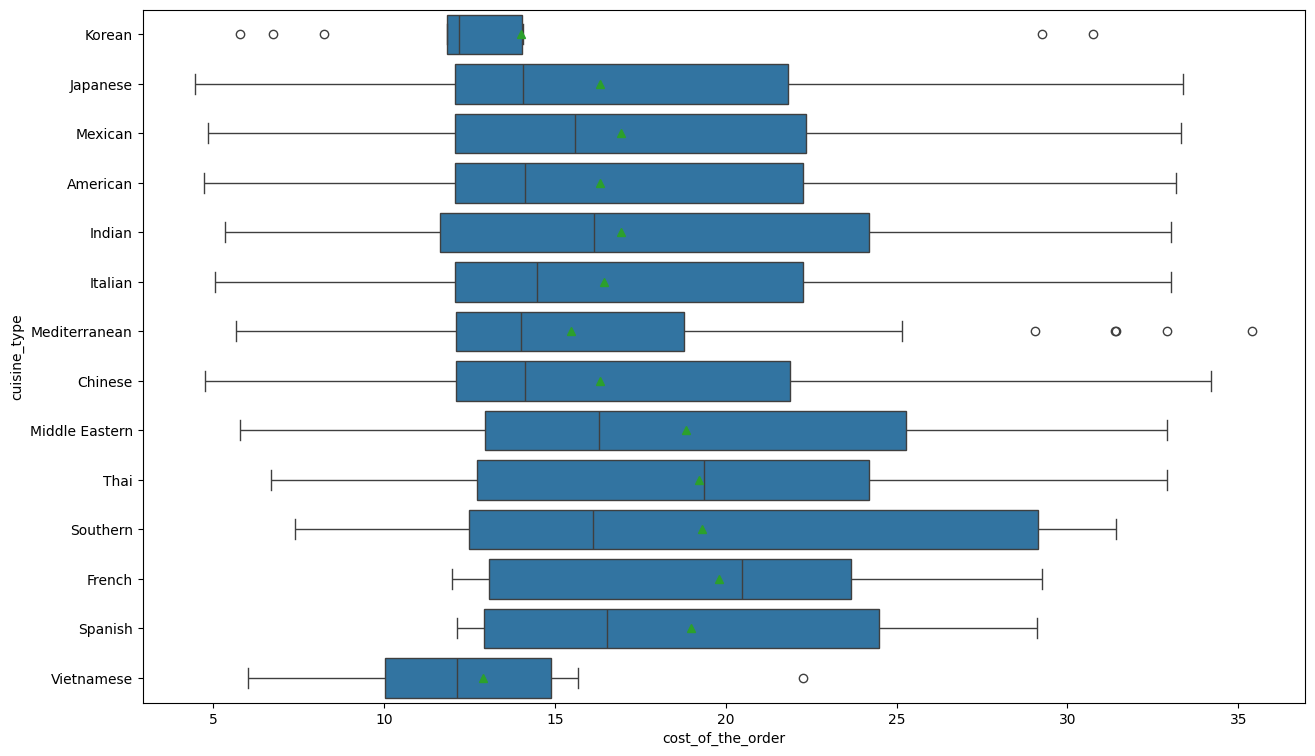

In [ ]:
plt.figure(figsize = (15,9))
sns.boxplot(data = data,y = 'cuisine_type',x = 'cost_of_the_order',showmeans = True);


*   Korean cuisine has a lower range and lower median cost, with some higher ouliers

*  Vietnamese cuisine appear to have higher variability in cost, with some outliers at the high end.

*   Mediterranean cuisine shows several outliers, indicating occasional high-cost orders.
*   Southern cuisine has the widest IQR indicating substantial range in the typical costs

*   French cusine has the highest median cost
*   American,Japanese,Chinese and Italian has lower median cost and tight range(ie not much variation in the pricing consistently) with no outliers,making them most affordable and predictable cuisine








### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
new
new = new.dropna()
new.info()
#new.loc[new['restaurant_name'] == 'Shake Shack']
#new_df = new.groupby('restaurant_name')['rating'].mean()
new_df = new.groupby(['restaurant_name'])['rating'].mean().reset_index()
#new_df = new_df[new_df>4]
#new_df['restaurant_name'].value_counts()
new_df


NameError: name 'new' is not defined

In [ ]:
data_copy = data.copy()#copy of the original dataframe is created,so that the original dataframe is not modified
data_grouped = data_copy[[data_copy['restaurant_name'] != 'Not given'],'rating']
data_grouped



InvalidIndexError: ([0       True
1       True
2       True
3       True
4       True
        ... 
1893    True
1894    True
1895    True
1896    True
1897    True
Name: restaurant_name, Length: 1898, dtype: bool], 'rating')

In [ ]:
data_grouped.drop

In [ ]:
data_grouped['rating'].value_counts(dropna = False)

,count
rating,
NaN,736
5.000,588
4.000,386
3.000,188


In [ ]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  1898 non-null   object 
 1   rating           1162 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.8+ KB


In [ ]:
#Deleting all the rows with NaN values
data_grouped = data_grouped.dropna()


In [ ]:
data_grouped['rating'].unique()


array([nan,  5.,  3.,  4.])

In [ ]:
data_grouped

,restaurant_name,rating
2,Cafe Habana,5.000
3,Blue Ribbon Fried Chicken,3.000
4,Dirty Bird to Go,4.000
5,Tamarind TriBeCa,3.000
7,Barbounia,3.000
...,...,...
1889,RedFarm Broadway,3.000
1890,TAO,5.000
1893,Chipotle Mexican Grill $1.99 Delivery,5.000
1894,The Smile,5.000


In [ ]:
new = data_grouped.groupby(['restaurant_name'])['rating'].mean().reset_index()
new

,restaurant_name,rating
0,'wichcraft,5.000
1,12 Chairs,4.500
2,5 Napkin Burger,4.000
3,67 Burger,5.000
4,Amma,4.500
...,...,...
151,Zero Otto Nove,4.000
152,brgr,3.000
153,da Umberto,5.000
154,ilili Restaurant,4.154


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  178 non-null    object 
 1   rating           156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
data_grouped_avg = new.loc[new['rating']>4].reset_index()
data_grouped_avg

,index,restaurant_name,rating
0,0,'wichcraft,5.000
1,1,12 Chairs,4.500
2,3,67 Burger,5.000
3,4,Amma,4.500
4,6,Anjappar Chettinad,5.000
...,...,...,...
105,149,Yama 49,5.000
106,150,Yama Japanese Restaurant,4.500
107,153,da Umberto,5.000
108,154,ilili Restaurant,4.154


In [ ]:
data_grouped_count = data_grouped.groupby(['restaurant_name'])['rating'].count().reset_index()
data_grouped_count
new = data_grouped_count.loc[data_grouped_count['rating']>50]
new

,restaurant_name,rating
16,Blue Ribbon Fried Chicken,64
17,Blue Ribbon Sushi,73
117,Shake Shack,133
132,The Meatball Shop,84


In [ ]:
cos#Creating a new dataframe with the restaurant name and the total no of counts for each restaurant
data_grouped_rating_count = data_grouped.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
data_grouped_rating_count.head(10)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [ ]:
#getting sthe rows with rating count >50
data_grouped_rating_count = data_grouped_rating_count.loc[data_grouped_rating['rating']>50]
data_grouped_rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
##Creating a new dataframe with the restaurant name and the avg rating for each restaurant
data_grouped_rating_avg = data_grouped.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
data_grouped_rating_avg

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


In [ ]:
#creating a dataframe with the restaurants having avg rating >4.0
data_grouped_rating_avg = data_grouped_rating_avg.loc[data_grouped_rating_avg['rating']>4]

In [ ]:
data_grouped_rating_avg

,restaurant_name,rating
0,'wichcraft,5.000000
1,Ravagh Persian Grill,5.000000
2,Chola Eclectic Indian Cuisine,5.000000
3,Chote Nawab,5.000000
4,Junoon,5.000000
...,...,...
105,Cafe Mogador,4.153846
106,ilili Restaurant,4.153846
107,Parm,4.128205
108,Rubirosa,4.125000


In [ ]:
#Merging dataframes to get a list of restaurants with avg  rating >4 and no of ratings >50
pd.merge(data_grouped_rating,data_grouped_rating_avg,on='restaurant_name',how = 'inner')

,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
data['']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31,54


In [ ]:
# Write the code here
cost_greater_than_20 = data.loc[data['cost_of_the_order'] >20]#data.loc[data['cost_of_the_order']>20]
cost_greater_than_20
cost_greater_than_20['Extra_charge'] = cost_greater_than_20['cost_of_the_order'] + cost_greater_than_20['cost_of_the_order']*0.25
revenue1 = cost_greater_than_20['Extra_charge'].sum()
revenue1.round(4)

<ipython-input-67-33691e724013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_greater_than_20['Extra_charge'] = cost_greater_than_20['cost_of_the_order'] + cost_greater_than_20['cost_of_the_order']*0.25


18443.6375

In [ ]:
cost_greater_than_5_less_than_20 = data.loc[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] < 20)]
cost_greater_than_5_less_than_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,51
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,49
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21,49
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30,63
...,...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.670,Weekend,5,20,22,42
1891,1476981,138586,Shake Shack,American,5.820,Weekend,Not given,22,28,50
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19,50
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31,54


In [ ]:
cost_greater_than_5_less_than_20['Extra_charge'] = cost_greater_than_5_less_than_20['cost_of_the_order'] + cost_greater_than_5_less_than_20['cost_of_the_order']*0.15
cost_greater_than_5_less_than_20

<ipython-input-160-9a5517e5d4f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_greater_than_5_less_than_20['Extra_charge'] = cost_greater_than_5_less_than_20['cost_of_the_order'] + cost_greater_than_5_less_than_20['cost_of_the_order']*0.15


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Extra_charge
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,13.892
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,14.065
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,13.329
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21,6.981
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30,6.865
...,...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.670,Weekend,5,20,22,18.020
1891,1476981,138586,Shake Shack,American,5.820,Weekend,Not given,22,28,6.693
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19,14.007
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31,14.007


In [ ]:
revenue2 = cost_greater_than_5_less_than_20['Extra_charge'].sum()
revenue2.round(4)

18994.7455

In [ ]:
total_revenue = revenue1 + revenue2
total_revenue.round(4)

37438.383

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time first
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

In [ ]:
num_of_orders = data.loc[data['total_time'] >60]
print("Number of orders with total time greater than 60 minutes = ",num_of_orders.shape[0])
print("Total number of orders = ",data.shape[0]);
print("Percentage of orders that takes more than 60 minutes to get delivered from the time the order is placedis =", (num_of_orders .shape[0]/data.shape[0]*100),"%")


Number of orders with total time greater than 60 minutes =  200
Total number of orders =  1898
Percentage of orders that takes more than 60 minutes to get delivered from the time the order is placedis = 10.537407797681771 %


#### Observations:

*  About 10% of the order placed took more than 60 min
*  This shows orders that take more  time are not perferred by the customers





### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

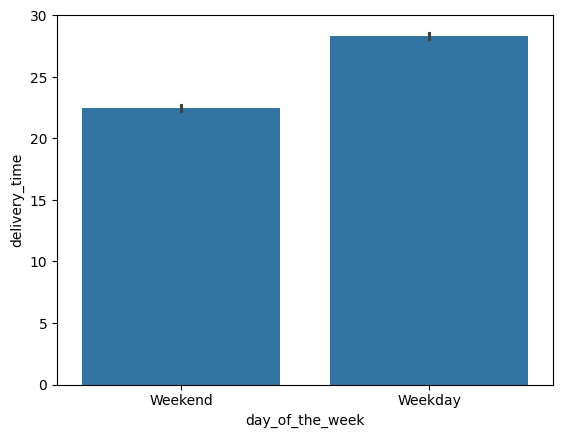

In [ ]:
sns.barplot(x='day_of_the_week',y='delivery_time',data=data)


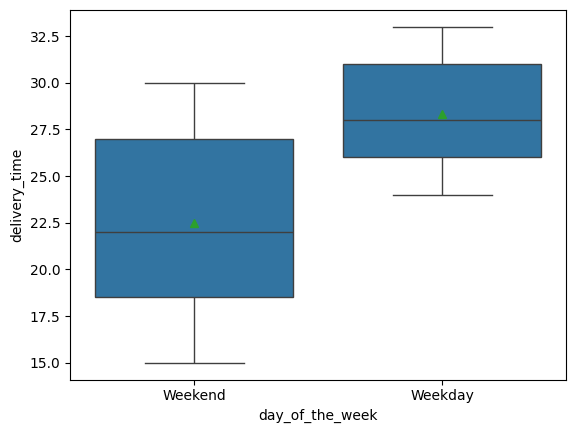

In [ ]:
sns.boxplot(x='day_of_the_week',y='delivery_time',data=data,showmeans = True);

In [ ]:
df = data.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()
df

,day_of_the_week,delivery_time
0,Weekday,28.340
1,Weekend,22.470


<Figure size 2000x900 with 0 Axes>

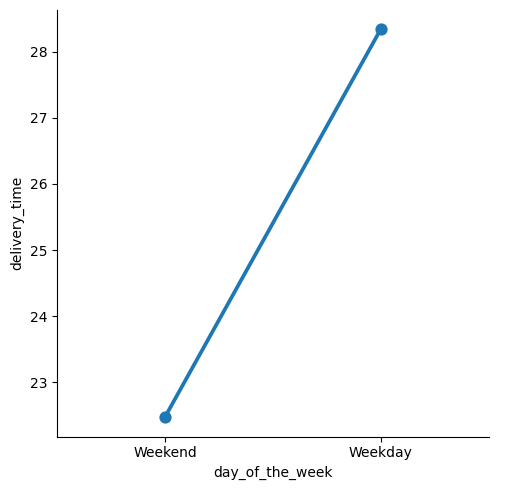

In [ ]:
plt.figure(figsize=(20,9))
sns.catplot(x='day_of_the_week',y='delivery_time',data=data,kind='point',errorbar=None);

#### Observations:


Delivery time is more during weekdays compared to weekend

Mean Delivery time on weekday is 28.3

Mean delivery time on weekend is 22.47





### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  On analysing the total no of orders per restaurants we find some of the restaurants are really popular while some of them are least preferred

*   Ratings are affected by the delivery time and the food preparation time
*   American,Japanese,Chinese and Italian has lower median cost and tight range(ie not much variation in the pricing consistently) with no outliers,making them most affordable and predictable cuisine

*   American cuisine is the most favourite cuisine followed by Japanese and Italian
*   Lower the cost of the order,higher the number of orders placed.

*   On analysing the ratings given by the customers it shows that the customers are mostly satisfied.But about 38% of the orders are 'not given' any ratings.So we cannot be sure that the average ratings would be this high if all the orders were rated
*   List item



*   About 71.2% of total orders placed are during the weekends




### Recommendations:

*  For restaurants with lower count it would be better to check if they are new additions,if they have limited availability or some other reason for lower interestorder


*   Delivery_time is greater during weekdays compared to weekends.It would be better to check what is the reason behind the delay in the delivery.
*   Number of orders placed on weekdays is lesser when compared to orders placed during weekend.Improving the delivery_time may increase the number of orders placed on weekdays as the working community is often time restricted on weekdays in their working environment

*   Steps should be taken to improve the food _prepartion and delivery time as the ratings are influenced by the time taken to deliver the food
*   More number of Spanish,Indian cuisines would be favourable as these cuisines are highly rated





---